In [115]:
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
!pip install pandasql
import numpy as np
import pandas as pd
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())
import seaborn as sns


In [117]:
df = pd.read_csv("AC_Data.csv")

In [118]:
df.rename({'0':'Date_and_Time'}, axis=1,inplace='True')
df['Date_and_Time'] = pd.to_datetime(df['Date_and_Time'])

In [119]:
df['Month'] = pd.DatetimeIndex(df['Date_and_Time']).month.astype(str)
df['Day'] = pd.DatetimeIndex(df['Date_and_Time']).day.astype(str)
df['Time'] = pd.DatetimeIndex(df['Date_and_Time']).time

In [120]:
df.head()

,Date_and_Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Day,Time
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,8,1,00:00:00
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,00:01:00
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,8,1,00:02:00
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,00:03:00
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,8,1,00:04:00


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_and_Time  87840 non-null  datetime64[ns]
 1   AC 1           43708 non-null  float64       
 2   AC 2           43711 non-null  float64       
 3   AC 3           43713 non-null  float64       
 4   AC 4           43704 non-null  float64       
 5   AC 5           43716 non-null  float64       
 6   AC 6           43717 non-null  float64       
 7   AC 7           43679 non-null  float64       
 8   AC 8           43704 non-null  float64       
 9   AC 9           43654 non-null  float64       
 10  AC 10          43690 non-null  float64       
 11  AC 11          43670 non-null  float64       
 12  AC 12          43713 non-null  float64       
 13  AC 13          43719 non-null  float64       
 14  AC 14          43696 non-null  float64       
 15  AC 15          4371

In [122]:
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


# **Maximum Consumption by** :

In [123]:
#Dropping Date_and_Time column to get the maximum from the AC's.
df_new = df[df.columns.difference(['Date_and_Time','Month','Day','Time'])]
df_new.notna().sum().nlargest(1)


AC 18    43723
dtype: int64

# **Minimum Consumption by :**

In [124]:
min_cons = df.notna().sum().nsmallest(1)
min_cons

AC 9    43654
dtype: int64

#Top5 Most Consuming and Least Consuming AC's

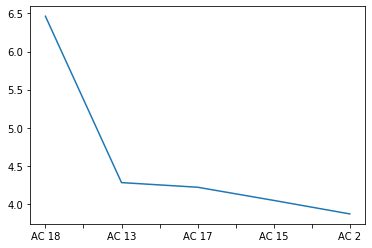

In [125]:
#Most
most_power_consuming = df_new.mean().sort_values(ascending=False).head()
most_power_consuming.plot()

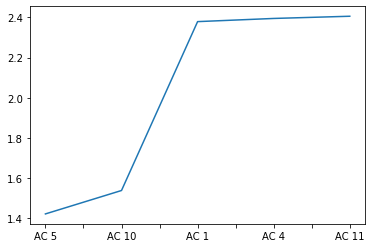

In [126]:
#Least
min_power_consuming = df_new.mean().sort_values(ascending=True).head()
min_power_consuming.plot()

In [127]:
df_notnull = df.dropna()
y1 = df_notnull.columns
total_ac = y1.delete([0,19,20,21])


#Variation of AC's w.r.t Consumption from each other

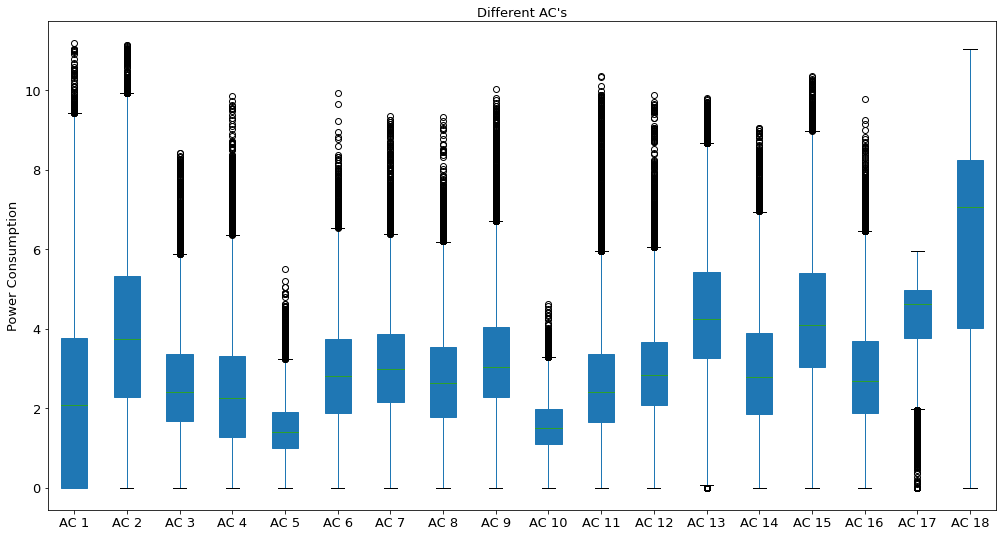

In [128]:
ax =df_notnull.plot(y= total_ac, kind='box',figsize=(17,9),xlabel ="Different AC's",ylabel = "Power Consumption",patch_artist=True)
ax.xaxis.set_label_position('top')
ax.set(xlabel="AC Distribution")
plt.xlabel("Different AC's",fontsize=13)
plt.ylabel('Power Consumption',fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=13)


##From the boxplots, we get to know that AC 18 has a lot of variation and is difficult to predict and has a really high median making it most consuming and least efficient AC.
##Most of the AC's have a lot of outliers which tells us that they are exceeding their maximum consumption a lot of times.
##On the contrary, AC's 5,10 are less consuming making them more efficient as most of the entries for each AC's are almost equally distributed.

#Fetching Temperature Data into Dataframe.

In [129]:
!pip install wwo_hist
from wwo_hist import retrieve_hist_data
import os
desktop = os.path.expanduser("/content")

In [130]:
temp_data= retrieve_hist_data(frequency=1,start_date = '1-AUG-2019',end_date = '30-SEPT-2019',api_key = '932604d656bf4a58b4d182227212310',location_list = ['Gurgaon'],
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Gurgaon


Currently retrieving data for Gurgaon: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:01.553160
Currently retrieving data for Gurgaon: from 2019-09-01 to 2019-09-30
Time elapsed (hh:mm:ss.ms) 0:00:03.265607


export Gurgaon completed!




In [131]:
temp = pd.read_csv("Gurgaon_Temp.csv",parse_dates=['date_time'],
                                index_col=['date_time'])



In [132]:
temp_data1 = mysql("select date_time,maxtempC from temp")

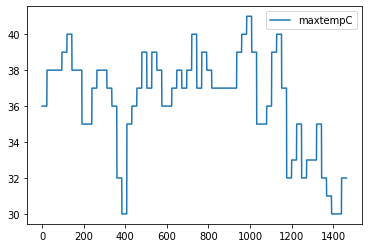

In [134]:
temp_data1.plot()

#Monthly Temperature Division for Trend
#### We get to know that temperature rose initially from August till September start and then started falling till the end of September.

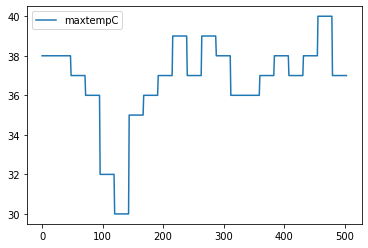

In [137]:
temp_data1['Month'] = pd.DatetimeIndex(temp_data1['date_time']).month.astype(str)
August_temp = mysql("select * from temp_data1 where Month = 8")
August_temp.plot()

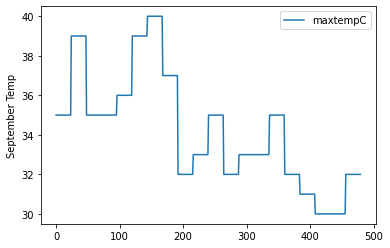

In [138]:
September_temp = mysql("Select * from temp_data1 where Month = 9")
September_temp.plot(ylabel='September Temp')

#Using PandaSQL and joining both DataFrames on common Date and Time column, removing null values and plotting graphs for each AC.

In [139]:
df.rename({'AC 1':'AC_1'},axis=1,inplace=True)
df.rename({'AC 2':'AC_2'},axis=1,inplace=True)
df.rename({'AC 3':'AC_3'},axis=1,inplace=True)
df.rename({'AC 4':'AC_4'},axis=1,inplace=True)
df.rename({'AC 5':'AC_5'},axis=1,inplace=True)
df.rename({'AC 6':'AC_6'},axis=1,inplace=True)
df.rename({'AC 7':'AC_7'},axis=1,inplace=True)
df.rename({'AC 8':'AC_8'},axis=1,inplace=True)
df.rename({'AC 9':'AC_9'},axis=1,inplace=True)
df.rename({'AC 10':'AC_10'},axis=1,inplace=True)
df.rename({'AC 11':'AC_11'},axis=1,inplace=True)
df.rename({'AC 12':'AC_12'},axis=1,inplace=True)
df.rename({'AC 13':'AC_13'},axis=1,inplace=True)
df.rename({'AC 14':'AC_14'},axis=1,inplace=True)
df.rename({'AC 15':'AC_15'},axis=1,inplace=True)
df.rename({'AC 16':'AC_16'},axis=1,inplace=True)
df.rename({'AC 17':'AC_17'},axis=1,inplace=True)
df.rename({'AC 18':'AC_18'},axis=1,inplace=True)

#This step might take a few mins on Colab as it is querying and storing 18 dataframes with- 80K+ rows 
#FOR Loops were avoided as it messes with the pandasql modules.

In [140]:
ac1 = mysql("Select AC_1, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac2 = mysql("Select AC_2, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac3 = mysql("Select AC_3, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac4 = mysql("Select AC_4, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac5 = mysql("Select AC_5, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac6 = mysql("Select AC_6, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac7 = mysql("Select AC_7, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac8 = mysql("Select AC_8, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac9 = mysql("Select AC_9, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac10 = mysql("Select AC_10, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac11 = mysql("Select AC_11, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac12 = mysql("Select AC_12, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac13 = mysql("Select AC_13, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac14 = mysql("Select AC_14, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac15 = mysql("Select AC_15, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac16 = mysql("Select AC_16, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac17 = mysql("Select AC_17, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")
ac18 = mysql("Select AC_18, temp_data1.maxtempC from df inner join temp_data1 on df.Date_and_Time=temp_data1.date_time")



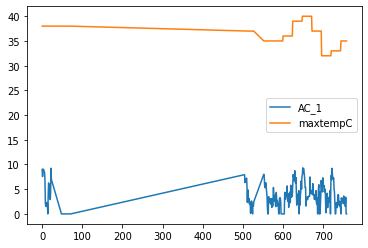

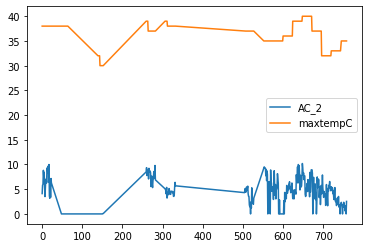

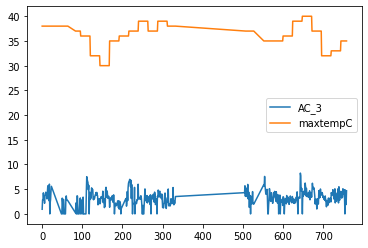

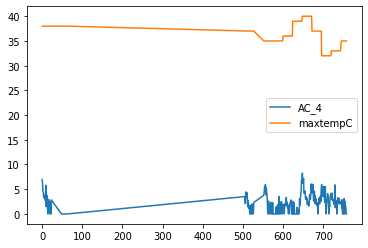

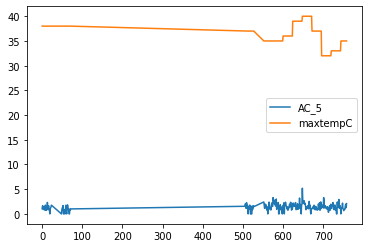

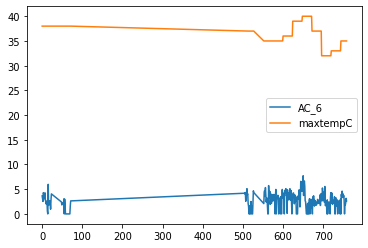

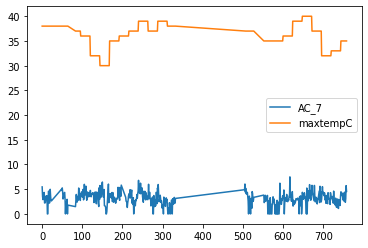

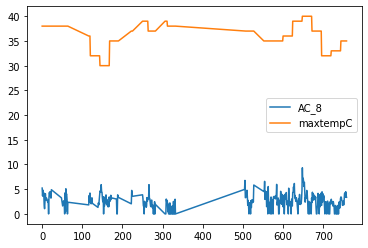

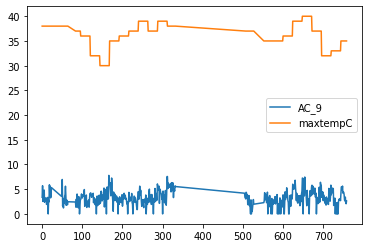

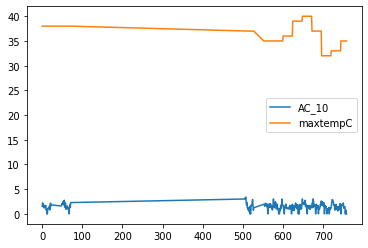

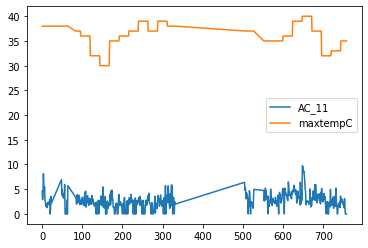

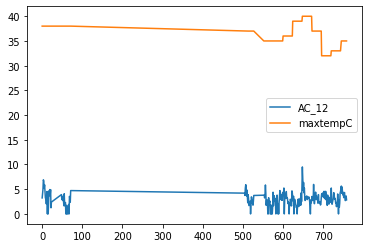

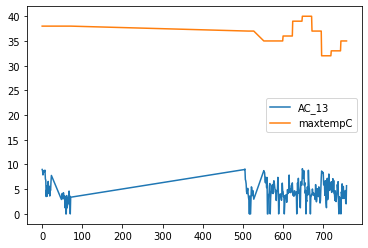

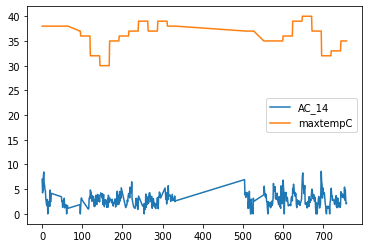

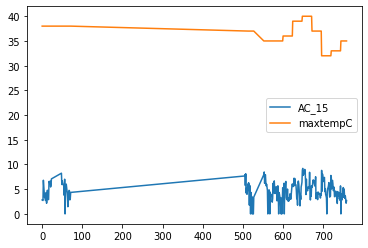

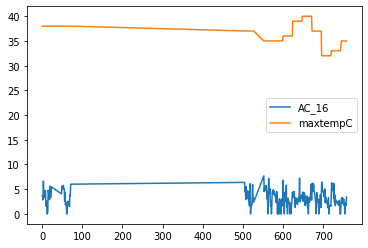

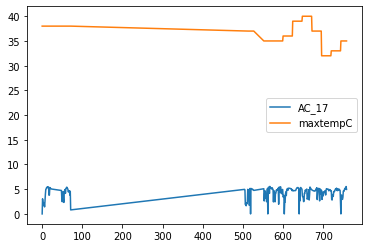

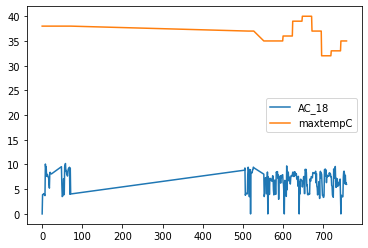

In [141]:
ac1.dropna().plot()
ac2.dropna().plot()
ac3.dropna().plot()
ac4.dropna().plot()
ac5.dropna().plot()
ac6.dropna().plot()
ac7.dropna().plot()
ac8.dropna().plot()
ac9.dropna().plot()
ac10.dropna().plot()
ac11.dropna().plot()
ac12.dropna().plot()
ac13.dropna().plot()
ac14.dropna().plot()
ac15.dropna().plot()
ac16.dropna().plot()
ac17.dropna().plot()
ac18.dropna().plot()

#Similarly by plotting all the graphs, I found a relation between Increased Power Consumption during higher temperatures in August, gradually falling in September.
#I also figured a missing data with very less power consumption which can relate to a power cut at the hotel or the rooms not using it between a window of ~15Aug-22Aug

#Diving deeper into the data made me conclude that some AC's were running in pairs of multiples like AC's [2,3,7,8,9,11,14] were running together for sometime in a span of windows.